### City guard attendance analytics

#### This notebook analyzes data of attendance of the guard of the city of Curitiba - Brazil from 2009 to 2018. The data are obtained in the site http://www.curitiba.pr.gov.br/dadosabertos and are open to anyone.

Reading the csv file:


In [19]:
import pandas as pd

df = pd.read_csv('2018-09-01_sigesguarda_-_Base_de_Dados_edit.csv', delimiter=";", error_bad_lines=False, encoding='ISO-8859-1')

df.head()

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (15,19,20,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ATENDIMENTO_ANO,ATENDIMENTO_BAIRRO_NOME,EQUIPAMENTO_URBANO_NOME,FLAG_EQUIPAMENTO_URBANO,FLAG_FLAGRANTE,LOGRADOURO_NOME,NATUREZA1_DEFESA_CIVIL,NATUREZA1_DESCRICAO,NATUREZA2_DEFESA_CIVIL,NATUREZA2_DESCRICAO,...,OCORRENCIA_HORA,OCORRENCIA_MES,OPERACAO_DESCRICAO,ORIGEM_CHAMADO_DESCRICAO,REGIONAL_FATO_NOME,SECRETARIA_NOME,SECRETARIA_SIGLA,SERVICO_NOME,SITUACAO_EQUIPE_DESCRICAO,NUMERO_PROTOCOLO_156
0,2009,CIDADE INDUSTRIAL,NaN,NÃO,NÃO,DAVI XAVIER DA SILVA,0,Alarmes,NaN,NaN,...,15:14:00,1,NaN,SIGA,CIC,FUNDAÇÃO DE AÇÃO SOCIAL,FAS,SIGA,NaN,NaN
1,2009,FAZENDINHA,BOSQUE DA FAZENDINHA,SIM,NÃO,CARLOS KLEMTZ,0,Roubo,NaN,NaN,...,15:22:00,1,NaN,153,PORTÃO,SECRETARIA MUNICIPAL MEIO AMBIENTE,SMMA,NORMAL,NaN,NaN
2,2009,UBERABA,NaN,NÃO,NÃO,DOUTOR JOÃO DE PAULA MOURA BRITO,0,Animais,NaN,NaN,...,15:59:00,1,NaN,156,CAJURU,SECRETARIA MUNICIPAL DA SAÚDE,SMS,SACAF,NaN,2640856.0
3,2009,SÍTIO CERCADO,NaN,NÃO,NÃO,EDGARD CAVALCANTI DE ALBUQUERQUE,0,Animais,NaN,NaN,...,16:13:00,1,NaN,156,BAIRRO NOVO,SECRETARIA MUNICIPAL DA SAÚDE,SMS,SACAF,NaN,2640854.0
4,2009,TATUQUARA,CENTRO DE ESPORTE E LAZER SANTA RITA,SIM,NÃO,CARLOS MUNHOZ DA ROCHA,0,Alarmes,NaN,NaN,...,16:29:00,1,NaN,SIGA,PINHEIRINHO,FUNDAÇÃO DE AÇÃO SOCIAL,FAS,SIGA,NaN,NaN


Outliers need to be removed:

In [44]:
rate = df["ATENDIMENTO_BAIRRO_NOME"].value_counts()
import numpy as np

rate[np.abs(rate-rate.mean()) <= (3*rate.std() )]



CAJURU                  11127
BOQUEIRÃO               10387
SÃO FRANCISCO            6412
ALTO BOQUEIRÃO           5781
TATUQUARA                5178
CAPÃO RASO               5104
PORTÃO                   5076
FAZENDINHA               4733
PINHEIRINHO              4707
UBERABA                  4365
ÁGUA VERDE               4268
BACACHERI                4204
SANTO INÁCIO             4183
NOVO MUNDO               4120
XAXIM                    3987
REBOUÇAS                 3696
SANTA FELICIDADE         3668
SANTA CÂNDIDA            3579
JARDIM BOTÂNICO          3148
BOA VISTA                3132
BAIRRO ALTO              2629
CAMPO COMPRIDO           2601
PILARZINHO               2514
BIGORRILHO               2277
HAUER                    2116
BARREIRINHA              2072
CENTRO CÍVICO            2042
CAPÃO DA IMBUIA          1957
CAMPO DE SANTANA         1932
CAMPINA DO SIQUEIRA      1803
                        ...  
NÃO ENCONTRADO              1
JD EUROPA                   1
SAO JOSE D

Evolution of occurrences registered in the neighborhood with the highest attendance rate and in the neighborhood with the lowest attendance rate: 

histogram:

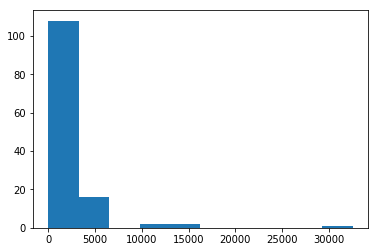

In [46]:
import matplotlib.pyplot as plt

plt.hist(rate)
plt.show()